In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from math import radians, cos, sin, asin, sqrt
from sklearn import  metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mae
sns.set()

In [2]:
df=pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
df.shape

(729322, 11)

In [6]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:

print('The value of largest 5 trip duration values are as follows : \n {} '.format(df['trip_duration'].nlargest(5)))
print('\nThe the number of rows their trip duration values equals to 1 is {}'.format(len(df[df['trip_duration']==1 ])))

The value of largest 5 trip duration values are as follows : 
 21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
Name: trip_duration, dtype: int64 

The the number of rows their trip duration values equals to 1 is 13


In [9]:
df=df[df.trip_duration!=df.trip_duration.max()]
df=df[df.trip_duration!=df.trip_duration.min()]

In [10]:
df['trip_duration_hour']=df['trip_duration']/3600


In [11]:
df.passenger_count.value_counts()

1    517403
2    105096
5     38926
3     29692
6     24107
4     14050
0        32
9         1
7         1
Name: passenger_count, dtype: int64

In [12]:
df=df[df.passenger_count<=6]
df=df[df.passenger_count!=0]

In [13]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [14]:
df['pickup_month'].value_counts()

3    128307
4    125627
5    124194
2    119354
6    117404
1    114388
Name: pickup_month, dtype: int64

In [15]:
df['dropoff_month'].value_counts()

3    128275
4    125626
5    124229
2    119351
6    117378
1    114362
7        53
Name: dropoff_month, dtype: int64

In [16]:
print(df[df.dropoff_month==7].pickup_datetime.dt.month.value_counts())
print(df[df.dropoff_month==7].pickup_datetime.dt.day.value_counts())

6    53
Name: pickup_datetime, dtype: int64
30    53
Name: pickup_datetime, dtype: int64


In [17]:
#To calculate the distance from latitudes and longitudes
from math import radians, cos, sin, asin, sqrt
def haversine(df):
    lat1, lon1, lat2, lon2 = df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude 
    R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    return R * c

In [18]:
df['distance'] = df.apply(lambda x: haversine(x), axis = 1)

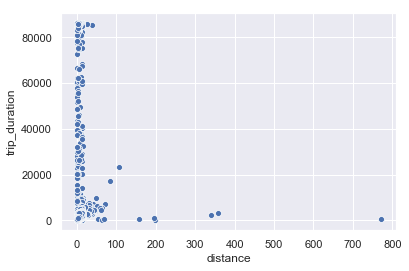

In [19]:
sns.scatterplot(x='distance',y='trip_duration',data=df)

In [20]:
print('The no of rides with distance = 0 are {}'.format(len(df[df.distance==0])))

The no of rides with distance = 0 are 2889


In [21]:
mean_dist=df['distance'].mean()
df.loc[df['distance']==0,'distance']=mean_dist

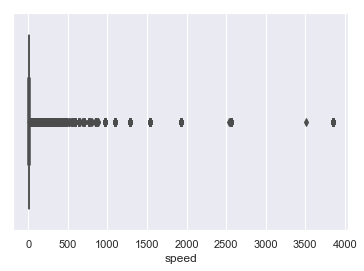

In [22]:
df['speed']=df['distance']/df['trip_duration_hour']
sns.boxplot(df['speed'])

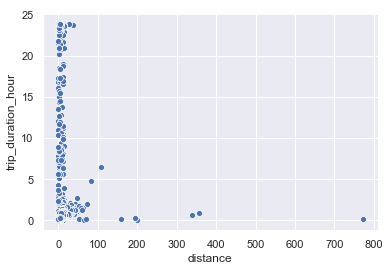

In [23]:
sns.scatterplot(x='distance',y='trip_duration_hour',data=df)

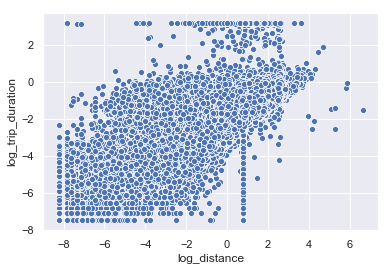

In [24]:

df['log_distance']=np.log(df.distance)
df['log_trip_duration']=np.log(df.trip_duration_hour)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

In [25]:
df=df[df.log_trip_duration<=2]

In [26]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'trip_duration_hour', 'pickup_day', 'dropoff_day',
       'pickup_month', 'dropoff_month', 'distance', 'speed', 'log_distance',
       'log_trip_duration'],
      dtype='object')

In [27]:
data2=df.loc[:,['passenger_count','store_and_fwd_flag','trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month','dropoff_month','pickup_timezone','dropoff_timezone','speed','log_distance','distance']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [28]:

data2=pd.get_dummies(data2,columns=['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month','pickup_timezone', 'dropoff_timezone'])

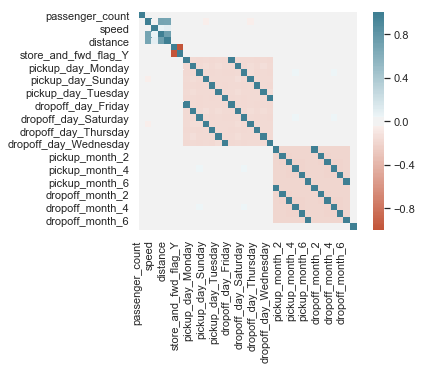

In [29]:
corr = data2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    horizontalalignment='right'
);

In [30]:
base_line_col=['distance']

In [31]:
predictor_cols=['passenger_count','distance','store_and_fwd_flag_N','store_and_fwd_flag_Y','pickup_day_Friday','pickup_day_Monday',
                'pickup_day_Saturday','pickup_day_Sunday','pickup_day_Thursday','pickup_day_Tuesday','pickup_day_Wednesday','dropoff_day_Friday',
                'dropoff_day_Monday','dropoff_day_Saturday','dropoff_day_Sunday','dropoff_day_Thursday','dropoff_day_Tuesday',
                'dropoff_day_Wednesday','pickup_month_1','pickup_month_5','pickup_month_6','dropoff_month_1','dropoff_month_5',
                'dropoff_month_6']
predictor_cols

['passenger_count',
 'distance',
 'store_and_fwd_flag_N',
 'store_and_fwd_flag_Y',
 'pickup_day_Friday',
 'pickup_day_Monday',
 'pickup_day_Saturday',
 'pickup_day_Sunday',
 'pickup_day_Thursday',
 'pickup_day_Tuesday',
 'pickup_day_Wednesday',
 'dropoff_day_Friday',
 'dropoff_day_Monday',
 'dropoff_day_Saturday',
 'dropoff_day_Sunday',
 'dropoff_day_Thursday',
 'dropoff_day_Tuesday',
 'dropoff_day_Wednesday',
 'pickup_month_1',
 'pickup_month_5',
 'pickup_month_6',
 'dropoff_month_1',
 'dropoff_month_5',
 'dropoff_month_6']

In [32]:
target_col=['trip_duration']

In [35]:
def modelfit(estimator,data_train,data_test,predictors,target):
    #print(data_train.head())
    #fitting model
    estimator.fit(data_train[predictors],data_train.loc[:,target])
    #train data prediction
    train_pred=estimator.predict(data_train[predictors])
    #cross_validation score
    cv_score=cross_val_score(estimator,data_train[predictors],data_train.loc[:,target],cv=20,scoring='neg_mean_squared_error')
    
    cv_score=np.sqrt(np.abs(cv_score))
    #Print model report:
    print ("\nModel Report")
    print ("RMSE on Train Data: %.4g" % np.sqrt(metrics.mean_squared_error(data_train.loc[:,target].values, train_pred)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    test_pred=estimator.predict(data_test[predictors])
    print ("RMSE on Test Data: %.4g" % np.sqrt(metrics.mean_squared_error(data_test.loc[:,target].values, test_pred)))
    
    return test_pred

In [36]:
validation_size = 0.20
seed = 7
X_train, X_test = train_test_split(data2,test_size=validation_size, random_state=seed)

In [37]:
mean_pred=np.repeat(X_train[target_col].mean(),len(X_test[target_col]))
sqrt(mae(X_test[target_col],mean_pred))

664.1583834380903

In [38]:
alg1 = LinearRegression(normalize=True)
print('The baseline model')
y_pred=modelfit(alg1, X_train, X_test,base_line_col,target_col)
coef1 = alg1.coef_
print('The coeffient is {}'.format(coef1))

The baseline model

Model Report
RMSE on Train Data: 463
CV Score : Mean - 461.4 | Std - 47.83 | Min - 420.1 | Max - 592.6
RMSE on Test Data: 577.6
The coeffient is [[187.78103658]]


# Building a regression model.


Model Report
RMSE on Train Data: 458.1
CV Score : Mean - 456.5 | Std - 48.5 | Min - 415.3 | Max - 589.3
RMSE on Test Data: 573.9
The coeffient is 
dropoff_day_Thursday    -2.911917e+14
dropoff_day_Friday      -2.911917e+14
dropoff_day_Wednesday   -2.911917e+14
dropoff_day_Saturday    -2.911917e+14
dropoff_day_Tuesday     -2.911917e+14
dropoff_day_Monday      -2.911917e+14
dropoff_day_Sunday      -2.911917e+14
dropoff_month_1         -4.087820e+02
dropoff_month_6         -2.662200e+02
dropoff_month_5         -6.597260e+01
passenger_count          5.027337e+00
pickup_month_5           1.196910e+02
distance                 1.879400e+02
pickup_month_6           3.215494e+02
pickup_month_1           3.832317e+02
pickup_day_Sunday        2.538081e+14
pickup_day_Monday        2.538081e+14
pickup_day_Saturday      2.538081e+14
pickup_day_Tuesday       2.538081e+14
pickup_day_Wednesday     2.538081e+14
pickup_day_Friday        2.538081e+14
pickup_day_Thursday      2.538081e+14
store_and_fwd_fl

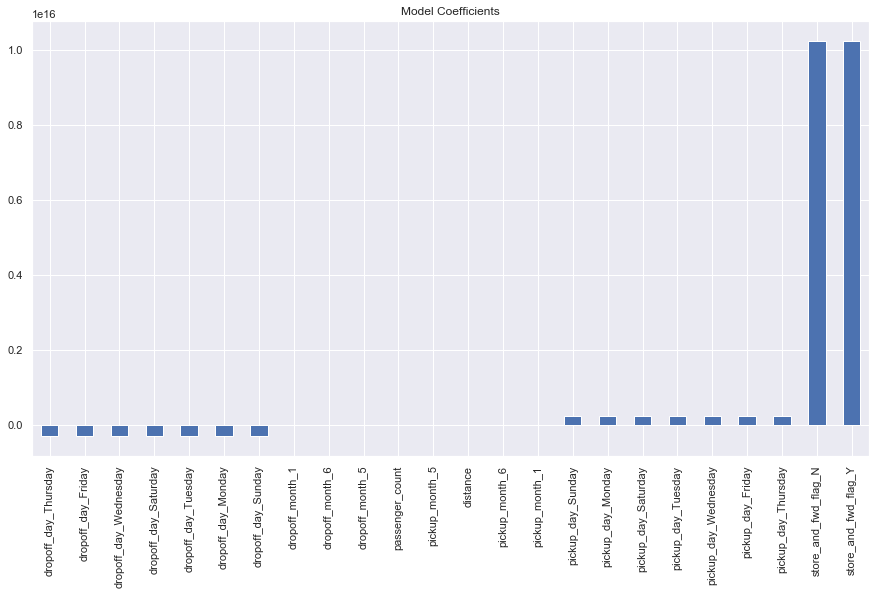

In [40]:
alg2 = LinearRegression(normalize=True)
y_pred=modelfit(alg2, X_train, X_test, predictor_cols,target_col)
coef1 = pd.Series(alg2.coef_[0], predictor_cols).sort_values()
print('The coeffient is \n{}'.format(coef1))
coef1.plot(kind='bar', title='Model Coefficients', figsize=(15,8))